## Homework 2 - Computational Chemistry
#### Cody R. Drisko

In [1]:
## Packages ##
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy


## Conversions ##
bohr_to_m = 5.29177e-11
AU_mass_to_kg = 9.10938e-31
AU_angMom_to_Js = 1.054572e-34
J_to_kJmol = 6.022e23 / 1000
eV_to_J = 1 / 6.24e18


## Functions ##
def E_n (n, h_bar, m_e, L):
    return (n**2 * np.pi**2 * h_bar**2) / (2 * m_e * L**2)

def psi_n(n, N, x):
    return N * np.cos(np.pi * x / 2)

def phi_n(n, N, x):
    return N * (1 - x**2)

def percent_difference(value1, value2):
    return (np.abs(value1 - value2) / np.abs((value1 + value2) / 2)) * 100

def integrand(r, N, xi):
    gofr = N * np.exp(-xi * r**2)
    return gofr * r * (-xi* r * gofr *(2 * xi * r**2 - 3) - gofr) 

___
### Question 1a

In [2]:
energy_Hartree = E_n(1, 1, 1, 2)
energy_kJmol = E_n(1, (1*AU_angMom_to_Js), (1*AU_mass_to_kg), (2*bohr_to_m)) * J_to_kJmol
energy_eV = E_n(1, (1*AU_angMom_to_Js/eV_to_J), (1*AU_mass_to_kg), (2*bohr_to_m)) * eV_to_J       


## Results ##
print("1a) E_1 = %0.3f Hartrees\n\
    E_1 = %0.3f kJ/mol\n\
    E_1 = %0.3f eV" %(energy_Hartree, energy_kJmol, energy_eV))

1a) E_1 = 1.234 Hartrees
    E_1 = 3239.010 kJ/mol
    E_1 = 33.563 eV


___
### Question 1b

1b) psi(-1) = 0
    psi(1) = 0
    The number of nodes = 0
    The normalization constant = 1


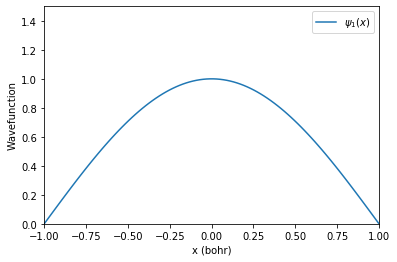

In [3]:
## Use SymPy to Get Normalization Constant ##
symX = sympy.Symbol("x")
N_1b = sympy.sqrt(1 / sympy.integrate((sympy.cos(sympy.pi * symX / 2)**2), (symX, -1, 1)))


## Set Psi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, N_1b, x[i])

    
## Get Nodes ##    
nodes=0
for i in range(1, 99):       ## Don't include first and last points
    if (psi_1[i] == 0):
        ++nodes

        
## Get Proper Boundary Conditions ##
boundCond1 = psi_1[0]
boundCond2 = psi_1[99]


## Results ##
print("1b) psi(-1) = %d\n\
    psi(1) = %d\n\
    The number of nodes = %d\n\
    The normalization constant = %d" %(boundCond1, boundCond2, nodes, N_1b))


## Plotting ##
plt.plot(x, psi_1, label=("$\\psi_1(x)$"))

plt.xlim(-1, 1)
plt.ylim(0, 1.5)
plt.xlabel("x (bohr)")
plt.ylabel("Wavefunction")
_ = plt.legend()

___
### Question 1c

1c) <E_1> = 1.25 Hartree

    The percent difference between the expectation value of the energy and
    the actual energy is 1.31%. This is small, telling us this function is a
    decent approximation to the actual wavefunction. The actual value is lower 
    than the approximation, which is predicted by the variational principle.


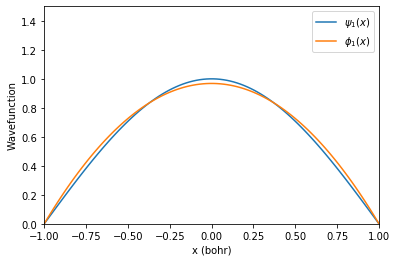

In [4]:
## Use SymPy to get Normalization Constant ##
symX = sympy.Symbol("x")
exprPhi = (1 - symX**2)
N_1c = sympy.sqrt(1 / sympy.integrate(exprPhi**2, (symX, -1, 1)))  ## N = sqrt(15)/4

if (sympy.integrate((sympy.sqrt(15)/4 * exprPhi)**2, (symX, -1, 1))) != 1:
    print("Not normalized")

    
## Expectation Value ##
braPhi = N_1c * exprPhi                                            ## <phi_1|
Ham_ketPhi = (-1/2) * sympy.diff(braPhi, symX, symX)               ## H|phi_1>
energy_Expect = sympy.integrate(braPhi * Ham_ketPhi, (symX, -1, 1))


## Results ##
print("1c) <E_1> = %0.2f Hartree\n\n\
    The percent difference between the expectation value of the energy and\n\
    the actual energy is %0.2f%%. This is small, telling us this function is a\n\
    decent approximation to the actual wavefunction. The actual value is lower \n\
    than the approximation, which is predicted by the variational principle." 
    %(energy_Expect, percent_difference(energy_Expect, energy_Hartree)))
    
    
## Comparison Between Psi_1 and Phi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)
phi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, N_1b, x[i])
    phi_1[i] = phi_n(1, N_1c, x[i])

    
## Plotting ##    
plt.plot(x, psi_1, label="$\\psi_1(x)$")
plt.plot(x, phi_1, label="$\\phi_1(x)$")

plt.xlim(-1, 1)
plt.ylim(0, 1.5)
plt.xlabel("x (bohr)")
plt.ylabel("Wavefunction")
_ = plt.legend()

___
### Question 2a

In [5]:
## Use SymPy to get Normalization Constant ##
r = sympy.Symbol("r")
gofr = sympy.exp(-r**2)
N_2a = float(sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo))))


## Results ##
energy, err = quad(integrand, 0, np.inf, args=(N_2a, 1))  
print("2a) <E> = %0.3f Hartrees" %energy)

2a) <E> = -0.096 Hartrees


___
### Question 2b

2b) The optimal value of <E> occurrs at a value of 0.28 for xi which gives an energy of
    -0.42 Hartrees. Comparing this to the actual energy of -0.50 Hartrees, we see that
    The percent difference between the two values is 16.35% which seems large but
    considering it is just a single function, it actually does pretty well.


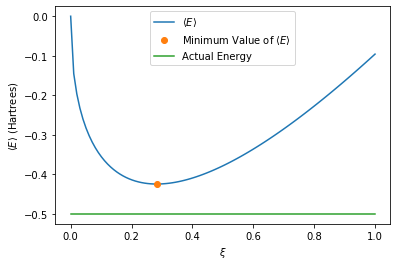

In [6]:
xi = np.linspace(0, 1, 100)
energy = np.zeros(100)
error = np.zeros(100)

for i in range(0, 100):
    gofr = sympy.exp(-xi[i] * r**2)
    N_2b = float(sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo))))
    energy[i], error[i] = quad(integrand, 0, np.inf, args=(N_2b, xi[i]))

bestEnergy = np.min(energy)
for i in range(0, 100):
    if energy[i] == bestEnergy:
        bestXi = xi[i]

    
## Results ##
print("2b) The optimal value of <E> occurrs at a value of %0.2f for xi which gives an energy of\n\
    %0.2f Hartrees. Comparing this to the actual energy of -0.50 Hartrees, we see that\n\
    The percent difference between the two values is %0.2f%% which seems large but\n\
    considering it is just a single function, it actually does pretty well." 
    %(bestXi, bestEnergy, percent_difference(bestEnergy, -0.5) ))


## Plotting ##
plt.plot(xi, energy, label="$\\langle E \\rangle$")
plt.plot(bestXi, bestEnergy, 'o', label="Minimum Value of $\\langle E \\rangle$")
plt.plot(xi, np.linspace(-.5, -.5, 100), label="Actual Energy")

plt.xlabel("$\\xi$")
plt.ylabel("$\\langle E \\rangle$ (Hartrees)")
_ = plt.legend()

___
### Question 2c

In [7]:
# ## Use SymPy to get Normalization Constant ##
# r = sympy.Symbol("r")
# xi = 1#sympy.Symbol("xi", positive = True)
# gofr = sympy.exp(-xi * r**2)
# N = sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo)))
# gofr *= N   ## Normalized

# def Hamiltonian_operator(r, waveFunction):
#     return -1/2 * sympy.diff(waveFunction, r, r) - 1/r * waveFunction
# function = gofr * r * Hamiltonian_operator(r, gofr * r)

# float(sympy.integrate(function, (r, 0, sympy.oo)))

# r = sympy.Symbol("r")
# def Hamiltonian_operator(r, waveFunction):
#     return -1/2 * sympy.diff(waveFunction, r, r) - 1/r * waveFunction

# def this(r, xi):
#     gofr = sympy.exp(-xi * r**2)
#     N = sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo)))
#     gofr *= N   ## Normalized
#     function = gofr * r * Hamiltonian_operator(r, gofr * r)
#     return float(sympy.integrate(function, (r, 0, sympy.oo)))

# xi = np.linspace(0, 1, 100)
# answer = np.zeros(100)
# for i in range(0, 100):
#     answer[i] = this(r, xi[i])

# minimum = np.min(answer)
# for i in range(0, 100):
#     if answer[i] == minimum:
#         bestAnswer = xi[i]
        
# plt.plot(xi, answer)
# plt.plot(bestAnswer, minimum, 'o', label="(" + str(bestAnswer) + ", " + str(minimum) + ")")
# plt.plot(xi, np.linspace(-.5, -.5, 100))
# plt.legend()

# bestAnswer